# Dynamic MFA template (flow driven)

In [158]:
import pandas as pd
import numpy as np
import scipy.signal
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.colormaps as colormaps

In [159]:
def diag_frame(frame): # to retain indeces when diagonalizing
    frame_diag = pd.DataFrame(np.diagflat(frame))
    frame_diag.index = frame_diag.columns = frame.index
    return frame_diag

def convolve_frame(in1, in2, mode='full', boundary='fill', fillvalue=0):
    convolution = pd.DataFrame(scipy.signal.convolve2d(in1, in2, 
                                                       mode=mode,
                                                       boundary=boundary, 
                                                       fillvalue=fillvalue))
    convolution.index += in1.index[0]
    convolution.columns += in1.columns[0]
    return convolution


#### 1. Import data

In [15]:
datafile = 'In-class tutorials/MFA_II_tutorial_II.xlsx'

data = pd.read_excel(datafile, sheet_name='inflow_driven',index_col=0)
t_0, t_max = data.index[[0,-1]]

In [23]:
inflows = data.loc[:,'inflow']

#### 2. Define survival curve
Examples of often-used survival functions
- fixed lifetime (make manually)
- weibull        (scipy.stats.weibull_min)
- normal         (scipy.stats.norm)
- geometric      (scipy.stats.geom)
- uniform        (scipy.stats.uniform)
- lognormal      (scipy.stats.lognorm)

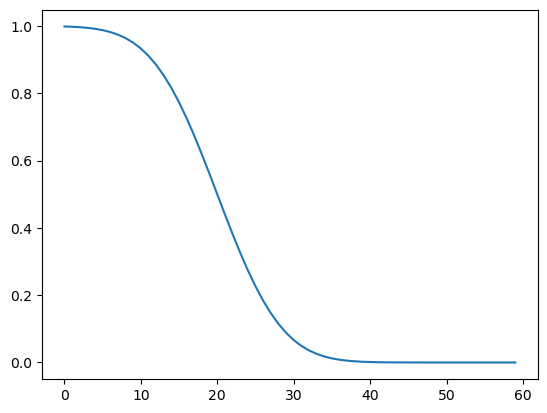

In [226]:
# Normally distributed survival curve
curve_mean = 20
curve_sd = curve_mean / 3
surv_curve = scipy.stats.norm.sf(np.arange(0,t_max-t_0),
                                 loc=curve_mean, scale=curve_sd)
lifetime_curve = scipy.stats.norm.pdf(np.arange(0,t_max-t_0),
                                      loc=curve_mean, scale=curve_sd)

plt.plot(surv_curve)
plt.show()

#### construct survival matrix

In [227]:
in_mat = diag_frame(inflows)

stock_by_cohort = convolve_frame(diag_frame(inflows),
                                 surv_curve.reshape(-1,1))

out_by_cohort = convolve_frame(diag_frame(inflows),
                               lifetime_curve.reshape(-1,1))

In [228]:
out_mat

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1990,0.005761,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1991,0.007738,0.006205,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1992,0.010290,0.008334,0.005318,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1993,0.013547,0.011082,0.007143,0.004432,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1994,0.017658,0.014589,0.009499,0.005953,0.003102,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.039287,0.053034,0.072947,0.104589,0.140226
2106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.039882,0.055408,0.080241,0.108664
2107,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.041668,0.060949,0.083367
2108,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045834,0.063324


C:\Users\troyt\AppData\Local\Temp\ipykernel_5432\1792494877.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stock_by_bins = stock_by_cohort.T.groupby(bins).sum().T


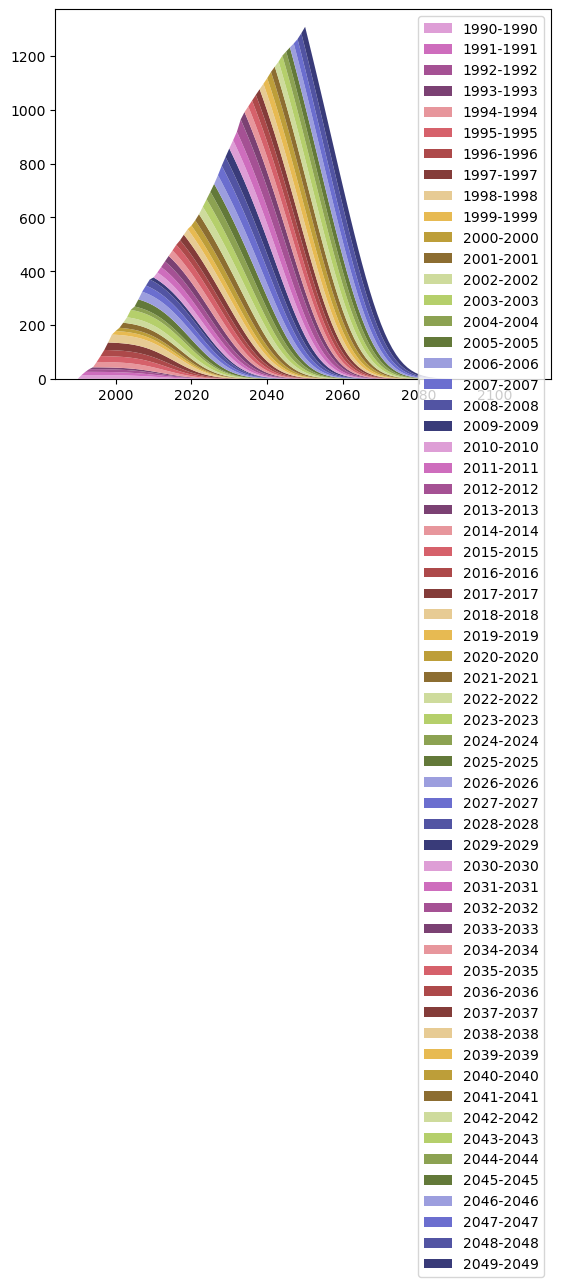

In [230]:
interval = 1

bin_range = out_by_cohort.columns[::interval]
bin_names = [f'{i}-{i+interval-1}' for i in bin_range]
bins = pd.cut(out_by_cohort.columns, bin_range, bin_names)

stock_by_bins = stock_by_cohort.T.groupby(bins).sum().T


colorcycle = colormaps['tab20b'](np.linspace(1,0,20))

plt.stackplot(stock_by_bins.index,stock_by_bins.T,labels=bin_names,
              colors=colorcycle)
plt.legend()
plt.show()

def bin_frame(frame, interval, axis=1):
    if axis == 1: frame = frame.T
        
    bins = pd.cut(frame.columns, frame.columns[::interval])
    frame = frame.groupby(bins).sum()
    
    if axis == 1: frame = frame.T
    return frame
        

